In [23]:
# Install Essential Libraries
!pip install ultralytics

In [24]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

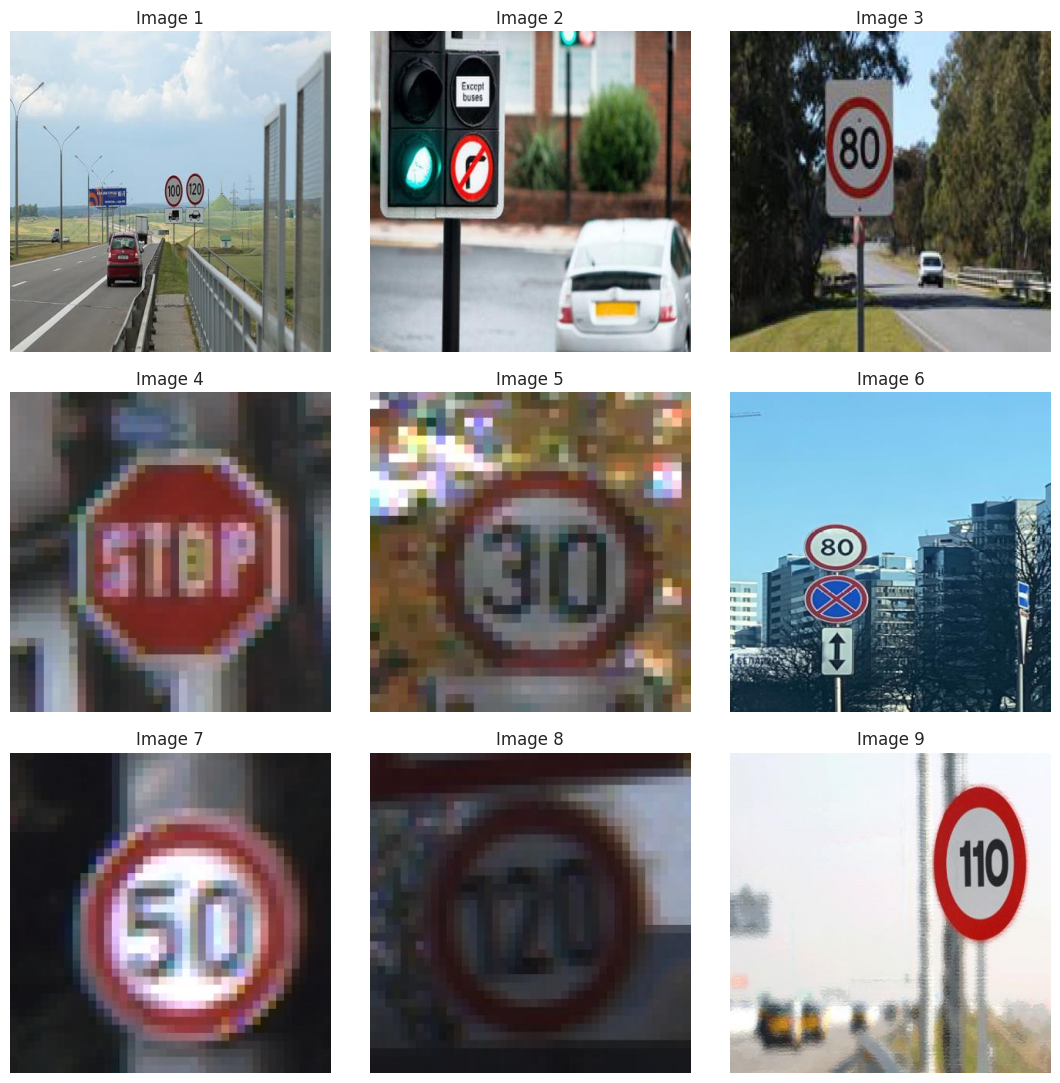

In [25]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [26]:
# Get the size of the image
image = cv2.imread("/kaggle/input/cardetection/car/train/images/00005_00015_00011_png.rf.481dbae7911d50da56c3cc5e4242b5ab.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 7.5ms
Speed: 0.8ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


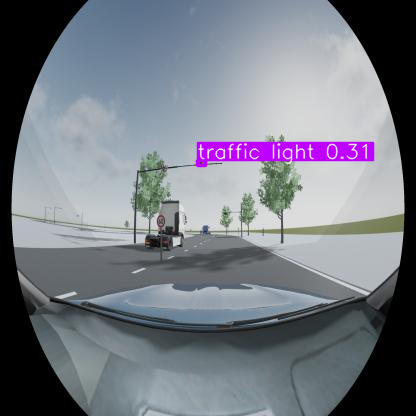

In [27]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [28]:
!pip install wandb
import wandb

# Replace 'your_api_key' with your actual API key
wandb.login(key='6f70c2ba3ec256ca6c9a7207a98ab3319899e52e')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [29]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/cardetection/car/data.yaml",epochs=30, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 'gpu')

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.42 🚀 Python-3.10.13 torch-2.1.2 CUDA:gpu (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:04<00:00, 777.65it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 663.94it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.05G     0.8484       3.49      1.097         20        416: 100%|██████████| 56/56 [00:21<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        801        944     0.0582      0.751      0.147      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.91G     0.7167      2.318      1.019         20        416: 100%|██████████| 56/56 [00:19<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


                   all        801        944      0.231      0.531      0.268      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.91G     0.7191       1.98     0.9997         24        416: 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


                   all        801        944      0.277      0.392       0.34      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       3.9G     0.6944      1.728     0.9886         26        416: 100%|██████████| 56/56 [00:20<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        801        944      0.511      0.475      0.499      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.88G     0.6794      1.482     0.9773         27        416: 100%|██████████| 56/56 [00:20<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


                   all        801        944      0.649      0.647      0.672       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.88G     0.6507      1.327     0.9623         18        416: 100%|██████████| 56/56 [00:19<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


                   all        801        944      0.819      0.643      0.736      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       3.9G     0.6519      1.249     0.9613         22        416: 100%|██████████| 56/56 [00:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


                   all        801        944      0.756      0.698      0.764       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       3.9G     0.6175      1.118     0.9521         22        416: 100%|██████████| 56/56 [00:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


                   all        801        944      0.806      0.709      0.805      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       3.9G     0.6153      1.072     0.9508         21        416: 100%|██████████| 56/56 [00:19<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.829      0.741      0.817      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.88G      0.613     0.9879     0.9466         26        416: 100%|██████████| 56/56 [00:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


                   all        801        944      0.816       0.76      0.824        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       3.9G     0.6109     0.9622     0.9424         14        416: 100%|██████████| 56/56 [00:19<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


                   all        801        944      0.841      0.752      0.831      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       3.9G     0.5987     0.9322     0.9375         26        416: 100%|██████████| 56/56 [00:19<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


                   all        801        944      0.882      0.764      0.849       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       3.9G     0.5873     0.8561      0.935         34        416: 100%|██████████| 56/56 [00:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.875      0.776      0.849      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.88G     0.5776     0.8461     0.9358         21        416: 100%|██████████| 56/56 [00:19<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        801        944      0.901       0.78      0.864      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.88G     0.5777      0.832     0.9321         27        416: 100%|██████████| 56/56 [00:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        801        944      0.926      0.785      0.872      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       3.9G     0.5673     0.7848     0.9313         19        416: 100%|██████████| 56/56 [00:19<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        801        944      0.932       0.81      0.884      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.91G     0.5631      0.763     0.9264         16        416: 100%|██████████| 56/56 [00:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        801        944      0.896      0.821      0.883      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.91G      0.547     0.7436     0.9228         18        416: 100%|██████████| 56/56 [00:19<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        801        944      0.948      0.798      0.889      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.88G      0.555     0.7277      0.927         26        416: 100%|██████████| 56/56 [00:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        801        944      0.935      0.796      0.881      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       3.9G     0.5423     0.6938     0.9232         32        416: 100%|██████████| 56/56 [00:19<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        801        944      0.935      0.823      0.898      0.779


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.89G     0.5349     0.5234     0.8734         11        416: 100%|██████████| 56/56 [00:20<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


                   all        801        944      0.935      0.822      0.901      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.89G     0.5326      0.486     0.8756         18        416: 100%|██████████| 56/56 [00:18<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


                   all        801        944      0.941      0.817      0.903      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.89G     0.5182      0.455     0.8702         10        416: 100%|██████████| 56/56 [00:18<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        801        944      0.964      0.832      0.915       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.89G     0.5123     0.4444     0.8692         10        416: 100%|██████████| 56/56 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


                   all        801        944      0.943      0.842      0.911      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.91G     0.5044     0.4259     0.8643         12        416: 100%|██████████| 56/56 [00:18<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


                   all        801        944      0.926      0.854      0.913      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.89G     0.4935     0.4144     0.8616         10        416: 100%|██████████| 56/56 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        801        944      0.957       0.84      0.917      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.89G     0.4886     0.4004     0.8609         13        416: 100%|██████████| 56/56 [00:18<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        801        944      0.949      0.866      0.923      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.89G     0.4832     0.3805     0.8685         10        416: 100%|██████████| 56/56 [00:18<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        801        944       0.94      0.867      0.922      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.89G     0.4751     0.3724     0.8546         12        416: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


                   all        801        944      0.932      0.866      0.924      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.89G     0.4712     0.3595      0.853         13        416: 100%|██████████| 56/56 [00:18<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


                   all        801        944      0.945      0.864      0.929       0.81

30 epochs completed in 0.207 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.13 torch-2.1.2 CUDA:gpu (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


                   all        801        944      0.942      0.866      0.929      0.809
           Green Light         87        122      0.849      0.645       0.74      0.425
             Red Light         74        108      0.891       0.62      0.752      0.459
       Speed Limit 100         52         52      0.953      0.942      0.966      0.879
       Speed Limit 110         17         17      0.858      0.882      0.974      0.907
       Speed Limit 120         60         60      0.982      0.929      0.989      0.902
        Speed Limit 20         56         56      0.982      0.966       0.99      0.859
        Speed Limit 30         71         74      0.972       0.95      0.975      0.919
        Speed Limit 40         53         55      0.959      0.909      0.978      0.874
        Speed Limit 50         68         71      0.968      0.831      0.955      0.857
        Speed Limit 60         76         76      0.956      0.895      0.941      0.862
        Speed Limit 7

lr/pg0,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▁▂▃▄▆▆▇▇▇▇▇▇▇▇▇███████████████
metrics/mAP50-95(B),▁▂▂▄▅▆▆▇▇▇▇▇▇▇▇▇██████████████
metrics/precision(B),▁▂▃▅▆▇▆▇▇▇▇▇▇███▇█████████████
metrics/recall(B),▆▃▁▂▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▃▂▂▂▂▂▂▁▁▁▁▁


In [30]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

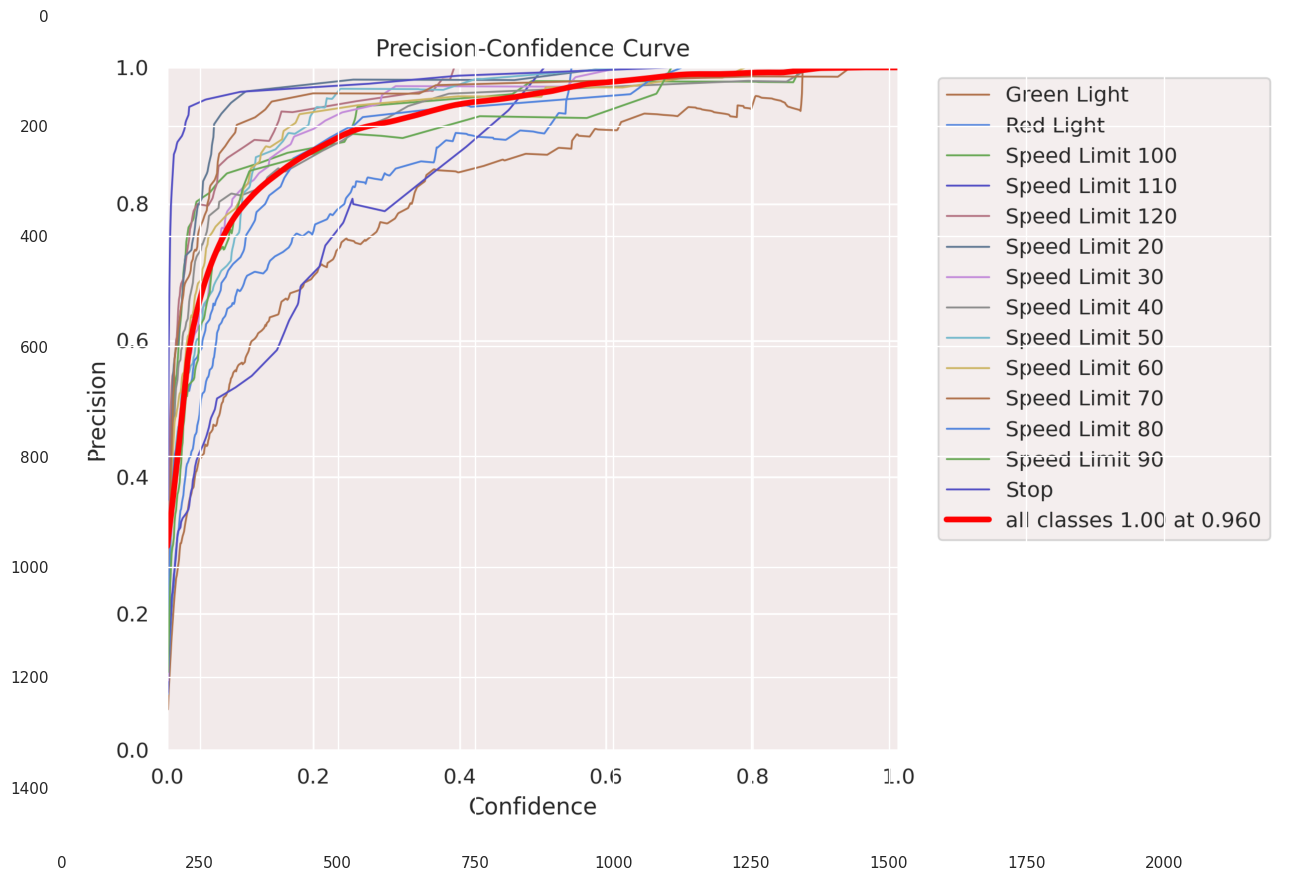

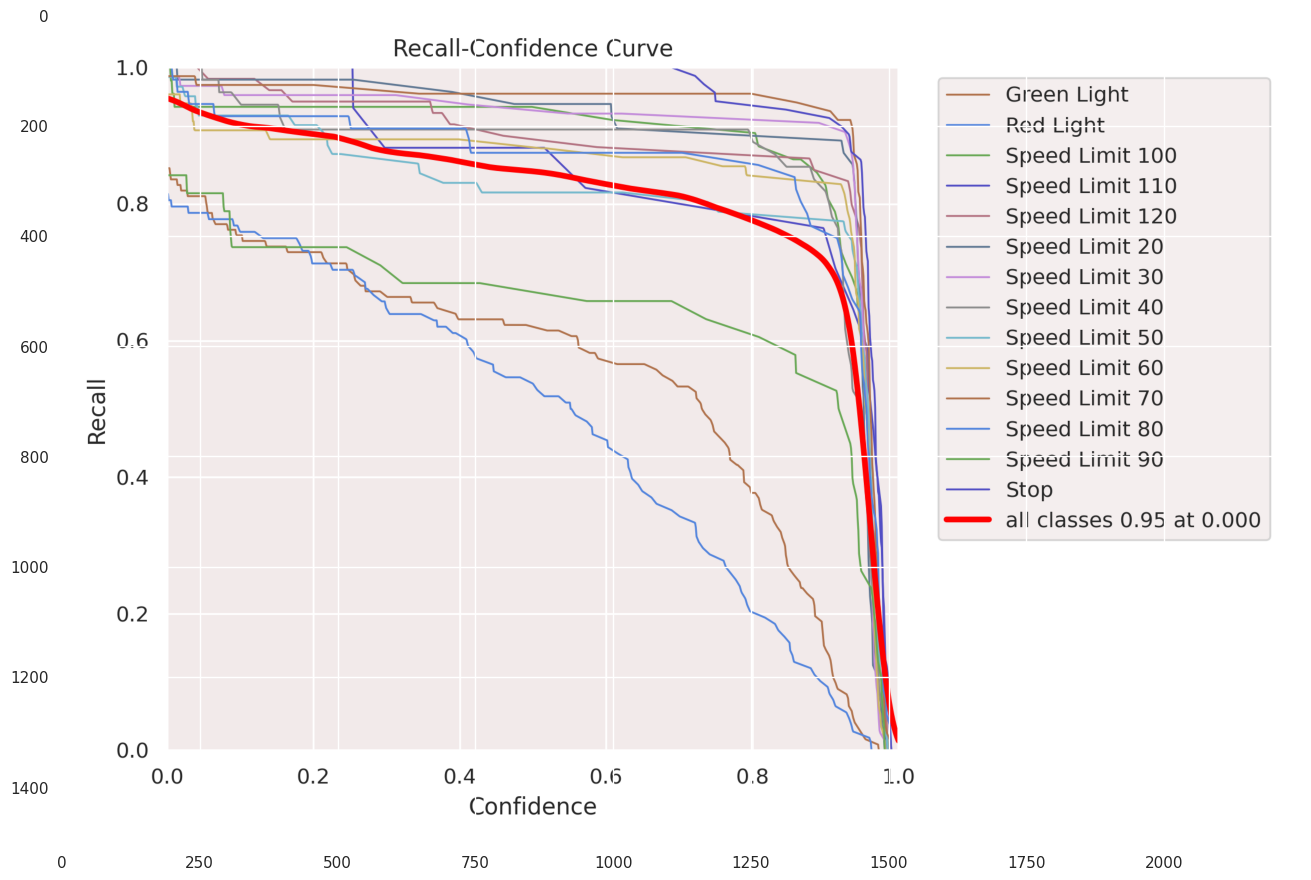

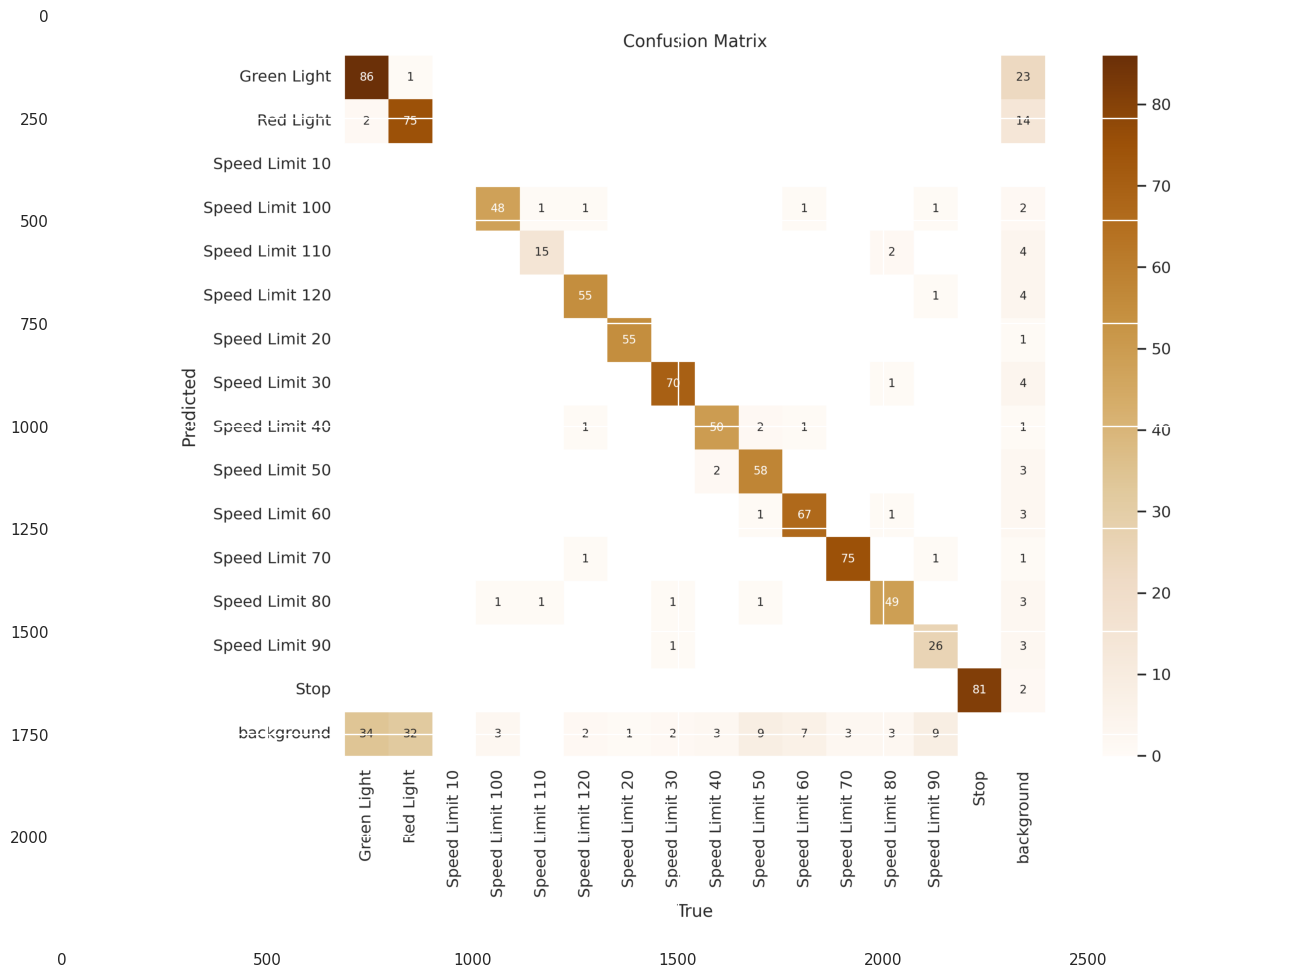

In [31]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/kaggle/working/runs/detect/train2/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [32]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train2/results.csv')
df=pd.read_csv('/kaggle/working/runs/detect/train2/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
20,21,0.53491,0.52338,0.87342,0.93531,0.82189,0.90078,0.77104,0.56708,0.43100,0.88161,0.000179,0.000179,0.000179
21,22,0.53258,0.48604,0.87561,0.94071,0.81704,0.90253,0.77510,0.55787,0.43694,0.87776,0.000161,0.000161,0.000161
22,23,0.51818,0.45500,0.87015,0.96389,0.83176,0.91525,0.78973,0.55433,0.38340,0.87947,0.000144,0.000144,0.000144
23,24,0.51230,0.44435,0.86922,0.94262,0.84229,0.91126,0.78517,0.55068,0.38885,0.88050,0.000127,0.000127,0.000127
24,25,0.50441,0.42586,0.86429,0.92597,0.85444,0.91339,0.79175,0.53693,0.38023,0.87124,0.000109,0.000109,0.000109
25,26,0.49354,0.41442,0.86163,0.95688,0.84013,0.91700,0.79939,0.53765,0.36266,0.87222,0.000092,0.000092,0.000092
26,27,0.48858,0.40044,0.86087,0.94905,0.86629,0.92334,0.80161,0.53223,0.34719,0.86907,0.000075,0.000075,0.000075
27,28,0.48316,0.38049,0.86851,0.94015,0.86689,0.92188,0.80352,0.53389,0.34390,0.86914,0.000057,0.000057,0.000057
28,29,0.47508,0.37241,0.85462,0.93236,0.86623,0.92438,0.80702,0.53180,0.33985,0.86845,0.000040,0.000040,0.000040
29,30,0.47121,0.35947,0.85298,0.94456,0.86432,0.92935,0.80969,0.52745,0.32737,0.86876,0.000023,0.000023,0.000023


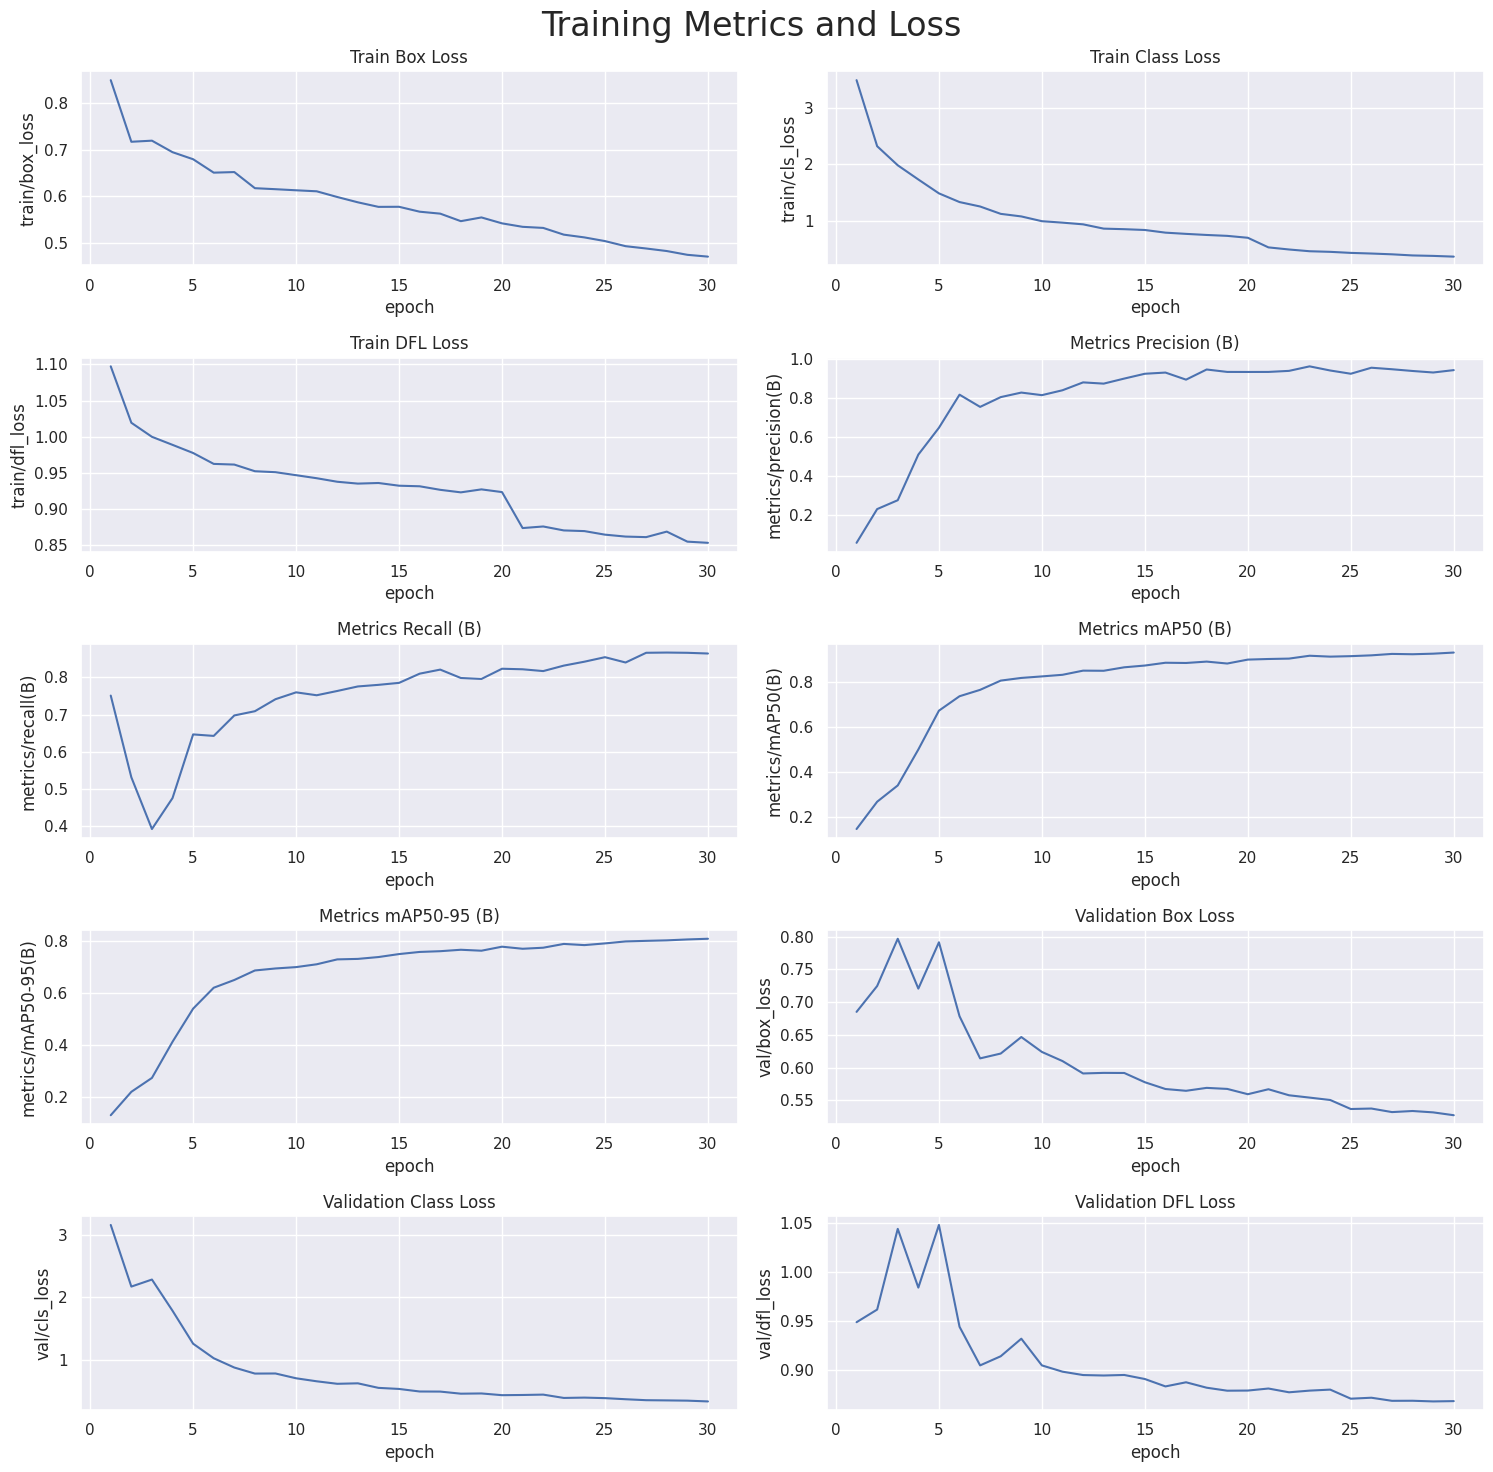

In [33]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train3/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

In [40]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9202238642196525
metrics/recall(B):  0.8055947150568535
metrics/mAP50(B):  0.8944331597657809
metrics/mAP50-95(B):  0.7688169804632717


In [64]:
# Path to the directory containing the images
image_dir = '/kaggle/input/cardetection/car/test/images'  

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=5)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Valid_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 (no detections), 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict

0: 416x416 1 Speed Limit 90, 11.4ms
Speed: 1.2ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict

0: 416x416 1 Speed Limit 90, 6.5ms
Speed: 1.0ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict

0: 416x416 (no detections), 6.5ms
Speed: 1.0ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict

0: 416x416 2 Red Lights, 6.1ms
Speed: 1.1ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict


In [38]:
#from IPython.display import display, Video

# Display the video
#display(Video("/kaggle/input/test-video/vecteezy_road-sign-caution-pedestrian-crossing-with-red-triangle-and_12899642.mp4", width=500))

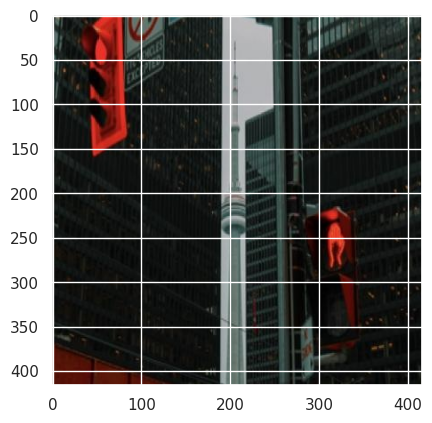

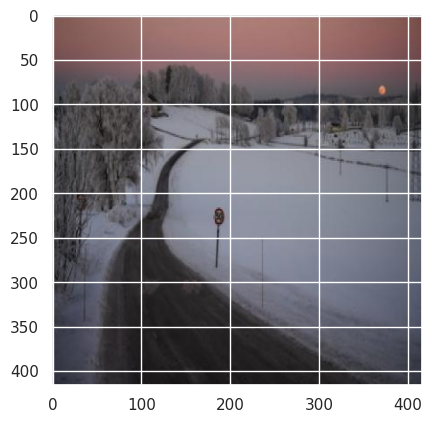

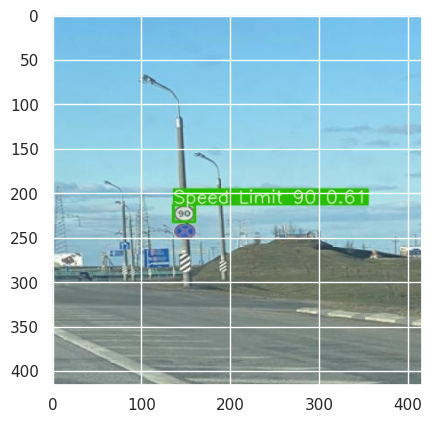

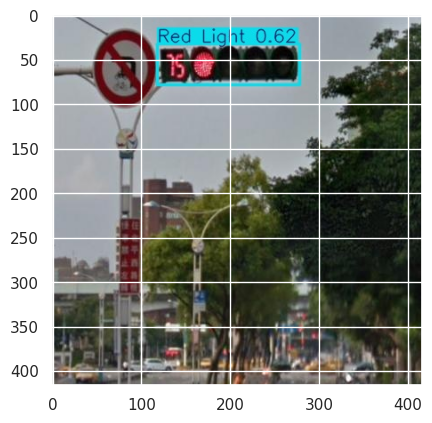

In [62]:
# View results
for i in range(9,13):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train3{i}/image0.jpg'))
    plt.show()

In [ ]:
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Updated dictionary of classes
classes = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110',
           'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40',
           'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80',
           'Speed Limit 90', 'Stop']

# Load the pre-trained YOLO model
#model = YOLO("yolov8n.pt")
model = YOLO('/kaggle/working/runs/detect/train3/weights/best.pt')

def predict_traffic_sign_from_frame(frame):
    results = model.predict(source=frame, imgsz=416, conf=0.5, iou=0.7)
    return results

def main():
    cap = cv2.VideoCapture("/kaggle/input/videos/video3.mp4")  # Use a video file

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        predicted_sign = predict_traffic_sign_from_frame(frame)
        for result in predicted_sign:
            boxes = result.boxes.xyxy.cpu().numpy()  # Convert to numpy array
            confs = result.boxes.conf.cpu().numpy()  # Convert to numpy array
            classes_ids = result.boxes.cls.cpu().numpy()  # Convert to numpy array
            for i, box in enumerate(boxes):
                x1, y1, x2, y2 = box.astype(int)
                conf = confs[i]
                cls = int(classes_ids[i])
                label = f"{classes[cls]} {conf:.2f}"
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Save the frame to disk
        output_filename = f"output_frame_{frame_number}.jpg"
        cv2.imwrite(output_filename, frame)

        # Display the frame using matplotlib
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {frame_number}")
        plt.axis('off')
        plt.show()

        frame_number += 1

    cap.release()

if __name__ == "__main__":
    main()
